## Importing csv file, finding missing values

In [9]:
import pandas as pd

df = pd.read_csv("pokemon_data.csv")
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [10]:
poke = df.dropna(subset=['Type 2'], how = 'any')

print("Old data frame length:", len(df), "\nNew data frame length:", 
       len(poke), "\nNumber of rows with at least 1 NA value: ",
       (len(df)-len(poke)))

Old data frame length: 800 
New data frame length: 414 
Number of rows with at least 1 NA value:  386


There is a lot of missing values, however they all are in Type 2 column, so I guess we can live without dropping them. I will be using df dataframe instead of poke dataframe from now on.

## Reading the data

In [8]:
print(df.columns)

print(df[['Name', 'Attack']][0:5])

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
                    Name  Attack
0              Bulbasaur      49
1                Ivysaur      62
2               Venusaur      82
3  VenusaurMega Venusaur     100
4             Charmander      52


In [14]:
# Looking for a specific row(s)
print(df.iloc[[1,22,453]])

       #      Name  Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
1      2   Ivysaur   Grass  Poison  60      62       63       80       80   
22    18   Pidgeot  Normal  Flying  83      80       75       70       70   
453  408  Cranidos    Rock     NaN  67     125       40       30       30   

     Speed  Generation  Legendary  
1       60           1      False  
22     101           1      False  
453     58           4      False  


In [10]:
print(df.iloc[2,1])

Venusaur


In [13]:
for index, row in df.iterrows():
    print(index, row['Name'])

0 Bulbasaur
1 Ivysaur
2 Venusaur
3 VenusaurMega Venusaur
4 Charmander
5 Charmeleon
6 Charizard
7 CharizardMega Charizard X
8 CharizardMega Charizard Y
9 Squirtle
10 Wartortle
11 Blastoise
12 BlastoiseMega Blastoise
13 Caterpie
14 Metapod
15 Butterfree
16 Weedle
17 Kakuna
18 Beedrill
19 BeedrillMega Beedrill
20 Pidgey
21 Pidgeotto
22 Pidgeot
23 PidgeotMega Pidgeot
24 Rattata
25 Raticate
26 Spearow
27 Fearow
28 Ekans
29 Arbok
30 Pikachu
31 Raichu
32 Sandshrew
33 Sandslash
34 Nidoran (Female)
35 Nidorina
36 Nidoqueen
37 Nidoran (Male)
38 Nidorino
39 Nidoking
40 Clefairy
41 Clefable
42 Vulpix
43 Ninetales
44 Jigglypuff
45 Wigglytuff
46 Zubat
47 Golbat
48 Oddish
49 Gloom
50 Vileplume
51 Paras
52 Parasect
53 Venonat
54 Venomoth
55 Diglett
56 Dugtrio
57 Meowth
58 Persian
59 Psyduck
60 Golduck
61 Mankey
62 Primeape
63 Growlithe
64 Arcanine
65 Poliwag
66 Poliwhirl
67 Poliwrath
68 Abra
69 Kadabra
70 Alakazam
71 AlakazamMega Alakazam
72 Machop
73 Machoke
74 Machamp
75 Bellsprout
76 Weepinbell
77 

750 AegislashBlade Forme
751 AegislashShield Forme
752 Spritzee
753 Aromatisse
754 Swirlix
755 Slurpuff
756 Inkay
757 Malamar
758 Binacle
759 Barbaracle
760 Skrelp
761 Dragalge
762 Clauncher
763 Clawitzer
764 Helioptile
765 Heliolisk
766 Tyrunt
767 Tyrantrum
768 Amaura
769 Aurorus
770 Sylveon
771 Hawlucha
772 Dedenne
773 Carbink
774 Goomy
775 Sliggoo
776 Goodra
777 Klefki
778 Phantump
779 Trevenant
780 PumpkabooAverage Size
781 PumpkabooSmall Size
782 PumpkabooLarge Size
783 PumpkabooSuper Size
784 GourgeistAverage Size
785 GourgeistSmall Size
786 GourgeistLarge Size
787 GourgeistSuper Size
788 Bergmite
789 Avalugg
790 Noibat
791 Noivern
792 Xerneas
793 Yveltal
794 Zygarde50% Forme
795 Diancie
796 DiancieMega Diancie
797 HoopaHoopa Confined
798 HoopaHoopa Unbound
799 Volcanion


In [22]:
#Might be useful to see all values of a specific column
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [15]:
df.loc[df['Type 1']== 'Fire']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
42,37,Vulpix,Fire,NaN,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,NaN,73,76,75,81,100,100,1,False
63,58,Growlithe,Fire,NaN,55,70,45,70,50,60,1,False
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False
83,77,Ponyta,Fire,NaN,50,85,55,65,65,90,1,False


In [15]:
len(df.loc[df['Type 1']== 'Fire'])

52

In [17]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [24]:
df.sort_values(['Type 1', 'HP'], ascending=[1,0])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
520,469,Yanmega,Bug,Flying,86,76,86,116,56,95,4,False
698,637,Volcarona,Bug,Fire,85,60,65,135,105,100,5,False
231,214,Heracross,Bug,Fighting,80,125,75,40,95,85,2,False
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False
678,617,Accelgor,Bug,NaN,80,70,40,100,60,145,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
106,98,Krabby,Water,NaN,30,105,90,25,25,50,1,False
125,116,Horsea,Water,NaN,30,40,70,70,25,60,1,False
129,120,Staryu,Water,NaN,30,45,55,70,55,85,1,False
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False


## Adding Total column

In [30]:
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [37]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [34]:
# How to drop unnecessary column
#df = df.drop(columns=['Total'])

In [31]:
df.sort_values(['Total'], ascending=False)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,45,30,35,20,20,45,1,False,195
288,265,Wurmple,Bug,NaN,45,45,35,20,30,20,3,False,195
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False,194
322,298,Azurill,Normal,Fairy,50,20,40,20,40,20,3,False,190


In [39]:
columns = list(df.columns.values)

df = df[columns[0:4] + [columns[-1]] + columns[4:12]]
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [41]:
df.to_csv('modified.csv', index=False)

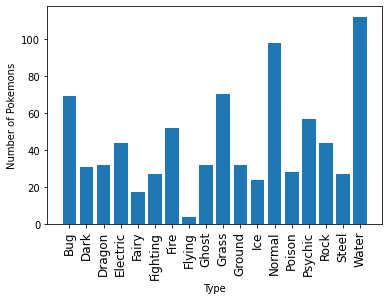

In [46]:
import matplotlib.pyplot as plt

keys = [pok_type for pok_type, df in df.groupby(['Type 1'])]

plt.bar(keys, df.groupby(['Type 1']).count()['Name'])
plt.xticks(keys, rotation='vertical', size=12)
plt.ylabel('Number of Pokemons')
plt.xlabel('Type')
plt.show()

In [49]:
df.loc[df['Type 1'] == 'Grass'].describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,344.871429,421.142857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143
std,200.264385,106.650626,19.516564,25.380520,24.485192,27.244864,21.446645,28.506456,1.579173
min,1.000000,180.000000,30.000000,27.000000,30.000000,24.000000,30.000000,10.000000,1.000000
25%,187.250000,318.500000,51.250000,55.000000,50.000000,57.000000,55.000000,40.000000,2.000000
50%,372.000000,430.000000,65.500000,70.000000,66.000000,75.000000,66.000000,58.500000,3.500000
75%,496.750000,497.000000,75.000000,93.500000,84.500000,99.500000,85.000000,80.000000,5.000000
max,673.000000,630.000000,123.000000,132.000000,131.000000,145.000000,129.000000,145.000000,6.000000


In [51]:
df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
77,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
652,591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False


In [59]:
new_df = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
new_df = new_df.reset_index(drop=True)
#new_df = new_df.drop(columns=['index'])
new_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
1,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
2,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
3,71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
4,591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False


In [62]:
df.loc[~df['Name'].str.contains('Mega')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


https://youtu.be/vmEHCJofslg?t=2402